<h1><center>Stack</center></h1>
<h2><center> Deep Learning com Pytorch</center></h2>

Usaremos o conjunto de dados MNIST que consiste em dígitos manuscritos em escala de cinza. Cada imagem é 28x28 pixels.Vamos dar uma olhada nos dados.


<center><img src="mnist.png"/></center>

In [ ]:
# https://pytorch.org/vision/stable/datasets.html?highlight=mnist#emnist

In [1]:
%matplotlib inline

import numpy as np
import torch
import matplotlib.pyplot as plt

# Download MNIST dataset

In [2]:

from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download dados de treino
trainset = datasets.MNIST('~/.pytorch_data/MNIST_data/', download=True, train=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=10, shuffle=True)

In [3]:
trainset

Dataset MNIST
    Number of datapoints: 60000
    Root location: C:\Users\borge/.pytorch_data/MNIST_data/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [4]:
trainloader

# A imagem

classe DataLoader em PyTorch  nos ajuda a carregar e iterar sobre elementos em um conjunto de dados. Esta classe está disponível como DataLoader no módulo torch.utils.data module. 

Agora nós temos os dados de treinamento no objeto trainloader. Vamos criar um interator em trainloader para que possamos fazer loop nos dados MNIST.

Nosso trainloader possui seguintes caracteristicas:
- Batch tamanho 10
    - Representa o número de imagens que nós vamos utilizar a cada iteração que passamos na nossa rede neural.
- Shuffle = True 
    - Para embaralhar os dados
    
Vamos dar uma olhada na primeira Batch: 

In [6]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [7]:
print('image type:',type(images))
print("image shape:", images.shape)


image type: <class 'torch.Tensor'>
image shape: torch.Size([10, 1, 28, 28])


In [8]:
print('labels shape:',labels.shape)
print("labels: ",labels)

labels shape: torch.Size([10])
labels:  tensor([5, 1, 0, 0, 9, 0, 9, 1, 2, 0])


Podemos ver que as imagens são tensores com shape **[10, 1, 28, 28]**. Ou seja, temos aqui **10 imagens por batch com um color channel ( cinza ) e 28 x 28 pixels por imagem.**

In [ ]:
plt.imshow(images[0].numpy().squeeze());

In [ ]:
plt.imshow(images[0].numpy().squeeze(), cmap='Greys_r');

# Criando a Rede Neural

## Rede Neural

<center><img src="net.png"/></center>

<center><img src="fc.png"/></center>

-

## Activation Functions

<center><img src="activation_functions-1.png"/></center>

* Transforma cada entrada em valores entre 0 e 1 e os normaliza para lhes dar uma distribuição de probabilidade adequada onde as probabilidades somam-se a 1.
    *  [**softmax function**](https://en.wikipedia.org/wiki/Softmax_function)

\begin{align}
\sigma(x_i) = \frac{e^{x_i}} {\sum_k^K{e^{x_k}}}
\end{align}


-

<center><img src="dp-diagram.png"/></center>

<center><img src="pixel_image.jpeg"/></center>

<center><img src="flatten.png"/></center>

-
* Fonte das imagens: 
 * [Diagrama criado no site draw.io](https://app.diagrams.net/)
 * [imagem em pixels](https://www.ovh.com/blog/deep-learning-explained-to-my-8-year-old-daughter/)
 * [imagem com flatten](https://www.w3resource.com/w3r_images/numpy-manipulation-ndarray-flatten-function-image-1.png)

---

### Losses em Pytorch

* [LogSoftMax](https://pytorch.org/docs/stable/generated/torch.nn.LogSoftmax.html)

\begin{align}
\sigma(x_i) = \frac{e^{x_i}} {\sum_k^K{e^{x_k}}}
\end{align}

<center><img src="logSoftMax.png"/></center>

* Negative log likelihood loss ( NLLLoss ) é útil treinar um problema de classificação com classes C.
    * [**NLLLoss**](https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html)
    * [**Outras loss functions**](https://pytorch.org/docs/stable/nn.html)

* A gente vai construir o modelo com uma saída **log-softmax** usando nn.LogSoftmax e depois obtemos as probabilidades reais tomando o exponencial torch.exp.
* Com uma saída log-softmax, podemos calcular a negative log likelihood loss, **nn.NLLLoss.**

In [9]:
from torch import nn

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs da camada escondida (ou hidden layer) - transformação linear
        self.hidden_1 = nn.Linear(784, 128)
        self.hidden_2 = nn.Linear(128,64)
        
        # camada de saida (ou Output layer) , 10 neurônios ou unidades - um para cada dígito do nosso dataset ( 0,1,2,3,4,5,6,7,8,9)
        self.output = nn.Linear(64, 10)
        
        # Define Relu activation e LogSoftmax output 
        self.Relu = nn.ReLU()
        self.LogSoftmax = nn.LogSoftmax(dim=1)
        
    def forward(self, x):
        # Pass o vetor de input em cada uma das nossas operações
        x = self.hidden_1(x)
        x = self.Relu(x)
        
        x = self.hidden_2(x)
        x = self.Relu(x)
        
        x = self.output(x)
        x = self.LogSoftmax(x)
        
        return x
    
modelo = Network()
modelo

Network(
  (hidden_1): Linear(in_features=784, out_features=128, bias=True)
  (hidden_2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
  (Relu): ReLU()
  (LogSoftmax): LogSoftmax(dim=1)
)

In [10]:
images.shape[0]

10

In [11]:
print("images (shape): ",images.shape)
print("images.shape[0]: ", images.shape[0])
print("images.view(images.shape[0], -1).shape: ", images.view(images.shape[0], -1).shape)

images (shape):  torch.Size([10, 1, 28, 28])
images.shape[0]:  10
images.view(images.shape[0], -1).shape:  torch.Size([10, 784])


In [12]:
from torch import optim

criterion = nn.NLLLoss()
optimizer = optim.SGD(modelo.parameters(), lr=0.003)

epocas = 5
for epoca in range(epocas):
    loss_ = 0
    for images, labels in trainloader:
        # Flatten imagem em vetor de 784 elementos
        images = images.view(images.shape[0], -1)
    
        
        optimizer.zero_grad()
        output = modelo.forward(images)     
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()
        
        loss_ += loss.item()
    else:
        print(f"Loss Treino: {loss_/len(trainloader)}")

C:\Users\borge\anaconda3\lib\site-packages\torch\autograd\__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(


Loss Treino: 0.7409363886499778
Loss Treino: 0.3205686016249626
Loss Treino: 0.2655872146798453
Loss Treino: 0.22562309535592795
Loss Treino: 0.19489755468008418


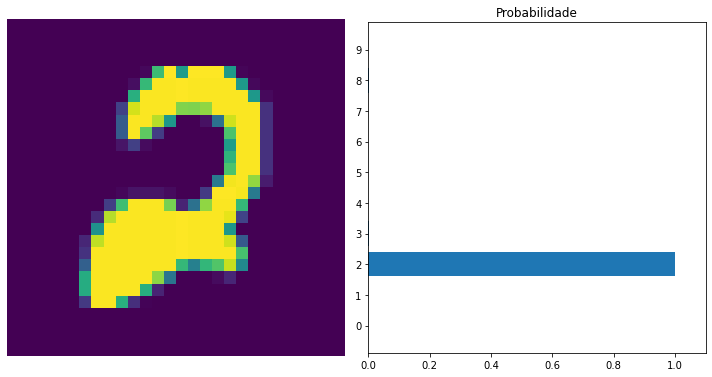

In [14]:
images, labels = next(iter(trainloader))

# torch.Size([1, 784]
img = images[0].view(1, 784)

# Bloqueia o calculo de gradiente - usado para avaliação
with torch.no_grad():
    logs = modelo(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
p = torch.exp(logs)
p = p.data.numpy().squeeze()


fig, (ax1, ax2) = plt.subplots(figsize=(10,9), ncols=2)
ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
ax1.axis('off')
ax2.barh(np.arange(10), p)
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(10))

ax2.set_yticklabels(np.arange(10))

ax2.set_title('Probabilidade')
ax2.set_xlim(0, 1.1)

plt.tight_layout()

## Uma Outra forma

> ## nn.Sequential

In [15]:

model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Quando tems iterações de backpropagations com os mesmos parâmetros, os gradientes são acumulados.  
        # Por isso precisamos zerar os gradientes em cada passagem de treinamento ou você manterá os gradientes das batches de treinamento anteriores
        optimizer.zero_grad() 
                              
        output = model.forward(images)     
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Loss Treino: {running_loss/len(trainloader)}")

Loss Treino: 0.7170689324066043
Loss Treino: 0.31889288167810687
Loss Treino: 0.26555575819693816
Loss Treino: 0.22472569833230227
Loss Treino: 0.19165358735946939


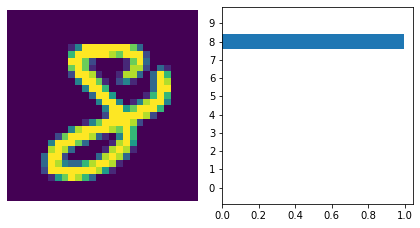

In [20]:
def show_classes(image, ps):

    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(image.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))

    plt.tight_layout()


images, labels = next(iter(trainloader))

image = images[0].view(1, 784)

with torch.no_grad():
    logs = model(image)

# A saída da rede são probabilidades logarítmicas
# Precisamos transforma-las em exponenciais para dar probabilidades
p = torch.exp(logs)

show_classes(image, p)

---


- source : 
- https://www.reddit.com/r/MachineLearning/comments/l1z8cr/d_best_way_to_draw_neural_network_diagrams/
- https://www.astroml.org/book_figures/chapter9/fig_neural_network.html